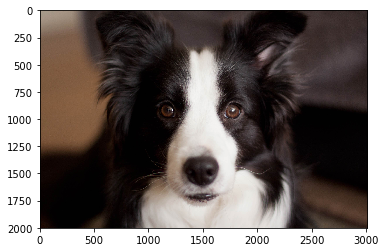

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Imagen inicial para algunos problemas
img = cv2.imread('Imagenes/doge.jpg')
fixImg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # corrección del color
plt.imshow(fixImg)

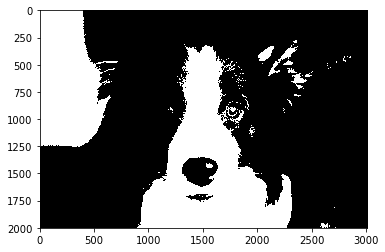

In [32]:
# 1. Apliquen un umbral binario a una imagen y muestren el resultado en escala de grises
gg = cv2.imread('Imagenes/doge.jpg', 0)
ret, th = cv2.threshold(gg, 75, 255, cv2.THRESH_BINARY)
plt.imshow(th, cmap='gray')

True

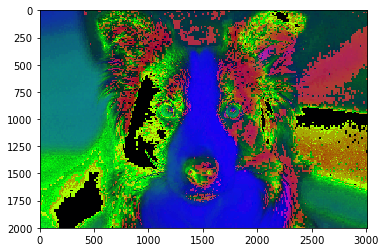

In [3]:
# 2. Cambien el formato de color de una imagen a HSV y guarden la imagen
imgHSV = cv2.cvtColor(fixImg, cv2.COLOR_RGB2HSV)
plt.imshow(imgHSV)
# Arregla el color para guardar la imagen
saveFixImg = cv2.cvtColor(imgHSV, cv2.COLOR_RGB2BGR)
cv2.imwrite('hsvdog3.png', saveFixImg)

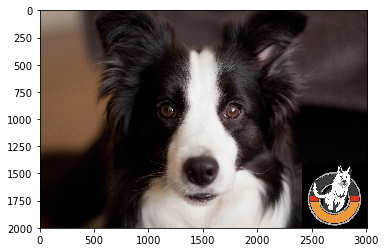

In [2]:
# 3.Agreguen a una imagen un efecto de marca de agua
markw = cv2.imread('Imagenes/markw.png')
markw = cv2.cvtColor(markw, cv2.COLOR_BGR2RGB)
markw = cv2.resize(markw,(600,600))
x_offset=3000-600
y_offset=2000-600
large_img = fixImg.copy()
small_img = markw

large_img[y_offset:y_offset+small_img.shape[0], x_offset:x_offset+small_img.shape[1]] = small_img
plt.imshow(large_img)


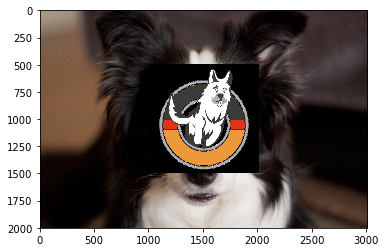

In [6]:
# 4. Combinen dos imágenes al agregar una imagen mas pequeña al centro de una imagen grande
small_img = cv2.imread('Imagenes/markw.png')
small_img = cv2.cvtColor(small_img, cv2.COLOR_BGR2RGB)
small_img = cv2.resize(small_img,(1000, 1000))
large_img = fixImg.copy()

# Punto medio en la imagen grande
middleY = int(large_img.shape[0]/2)
middleX = int(large_img.shape[1]/2)

x_offset = middleX-500
y_offset = middleY-500

large_img[y_offset:y_offset+small_img.shape[0], x_offset:x_offset+small_img.shape[1]] = small_img
plt.imshow(large_img)

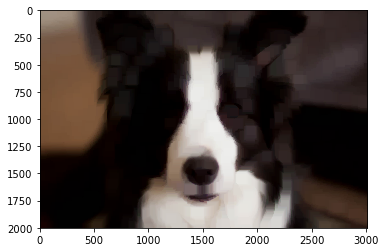

In [21]:
# 5. Apliquen operaciones morfologicas para crear un cierre y una apertura en la imagen 
# APERTURA
kernel = np.ones((75, 75),np.uint8)
opening = cv2.morphologyEx(fixImg, cv2.MORPH_OPEN, kernel)
plt.imshow(opening)

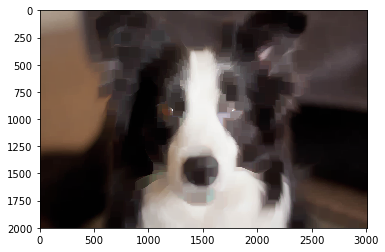

In [23]:
# CIERRE
kernel = np.ones((75, 75),np.uint8)
close = cv2.morphologyEx(fixImg, cv2.MORPH_CLOSE, kernel)
plt.imshow(close)

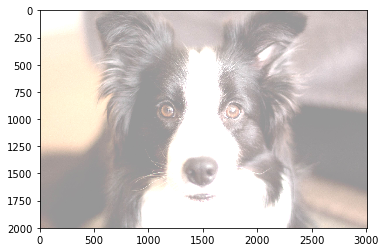

In [6]:
# 6. Cambien el brillo de la imagen
brightness = 150
contrast = 1 # escala los pixels, como no se desea se deja en 1
imgMod = cv2.addWeighted(fixImg, contrast, np.zeros(fixImg.shape, fixImg.dtype), 0, brightness)
plt.imshow(imgMod)

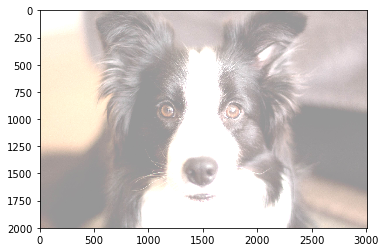

In [18]:
# Otra forma de cambiar el brillo
constrast = 1.0 # dejado en 1 ya que no se desea
brightness = 150

new_image = cv2.convertScaleAbs(fixImg, alpha=constrast, beta=brightness)
plt.imshow(new_image)

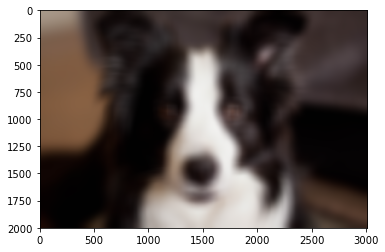

In [24]:
# 7. Difuminen una imagen
blur = cv2.blur(fixImg, (100, 100))
plt.imshow(blur)

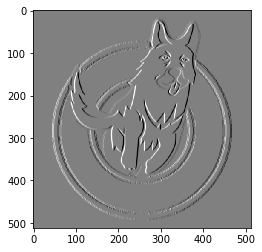

In [62]:
# 8. Apliquen un Horizontal Sobel Filter a una imagen con un Kernel de 5 y muestren el resultado en escala de grises
imgGS = cv2.imread('Imagenes/markw.png', 0)
sobelx = cv2.Sobel(imgGS, cv2.CV_64F, 1, 0, ksize=5)
plt.imshow(sobelx, cmap='gray')

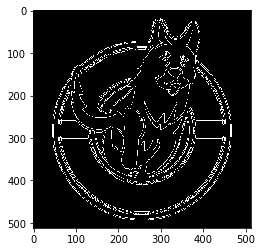

In [114]:
# 9. Apliquen un algoritmo para detectar las esquinas de una imagen
imgGS = cv2.imread('Imagenes/markw.png', 0)
edges = cv2.Canny(imgGS, 100, 150)
plt.imshow(edges, cmap='gray')